# Data Analysis Projest Life Cycle
- **Business Problem Understanding**
- **Data Collection**
- **Data Pre-processing**
- **Exploratory Data Analysis**
- **Reporting**

## Business Problem
**We need to analyze flight fare data to understand and uncover patterns in airfare prices. By analyzing historical data to give answers of questions like factors affecting prices,booking timing,etc**

## Data Collection
- Link: https://drive.google.com/file/d/1n9FqH3D1-nvviwvktEZeW4cgEPacGuRe/view?usp=drive_link

In [13]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
#load the data,copy the data and check shape
data=pd.read_csv('Flight_Data.csv',low_memory=False)
df=data.copy()
df.shape

(301206, 13)

### Data Pre-Processing
- **Data profilling**
- **Data cleaning**
- **Data consistency**
- **Data Formating**
- **Outlier Detection & Removal**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301206 entries, 0 to 301205
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        301206 non-null  int64  
 1   airline           300754 non-null  object 
 2   flight            301206 non-null  object 
 3   source_city       301206 non-null  object 
 4   departure_time    301206 non-null  object 
 5   stops             301206 non-null  object 
 6   arrival_time      301206 non-null  object 
 7   destination_city  301206 non-null  object 
 8   class             301006 non-null  object 
 9   duration          300956 non-null  float64
 10  days_left         301206 non-null  int64  
 11  price             301106 non-null  object 
 12  date              301206 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 29.9+ MB


In [16]:
df.isna().sum() #we need to drop null values from airline,price,class,duration

Unnamed: 0            0
airline             452
flight                0
source_city           0
departure_time        0
stops                 0
arrival_time          0
destination_city      0
class               200
duration            250
days_left             0
price               100
date                  0
dtype: int64

In [17]:
null_values_percentage = (df.isna().sum()/(df.shape[0]))*100
null_values_percentage

Unnamed: 0          0.000000
airline             0.150063
flight              0.000000
source_city         0.000000
departure_time      0.000000
stops               0.000000
arrival_time        0.000000
destination_city    0.000000
class               0.066400
duration            0.083000
days_left           0.000000
price               0.033200
date                0.000000
dtype: float64

### Data Profiling
1. **Unnamed:0 & date**
    - No need,should be dropped

3. **price**
    - Need to convert in numeric value 
    - Null values has to be dropped
    - Theres is outliers which can be removed

5. **duration**
    - need to convert in minutes
    - Drop the rows corresponding to null values

6. **stops**
    - should standardize

7. **airline,class**
    - Drop the rows corresponding to null values
   

### Data Cleaning

## Unnamed: 0 & date

In [18]:
# Drop the 'Unnamed: 0' and 'date' column

df.drop(columns=['Unnamed: 0','date'], inplace=True)


## price

In [19]:
# Convert 'price' column to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

## duration

In [20]:
# Convert 'duration' to minutes for consistency
df['duration'] = df['duration'] * 60

## stops

In [21]:
# Standardize categorical columns
df['stops'] = df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})

## Drop null values from price,airline,class and duration

In [22]:
#Drop null values from price,airline,class and duration and display cleaned data 
df.dropna(subset=['price','airline','class','duration'], inplace=True)
# Display cleaned data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 300204 entries, 0 to 301205
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300204 non-null  object 
 1   flight            300204 non-null  object 
 2   source_city       300204 non-null  object 
 3   departure_time    300204 non-null  object 
 4   stops             300204 non-null  int64  
 5   arrival_time      300204 non-null  object 
 6   destination_city  300204 non-null  object 
 7   class             300204 non-null  object 
 8   duration          300204 non-null  float64
 9   days_left         300204 non-null  int64  
 10  price             300204 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 27.5+ MB
None
    airline   flight source_city departure_time  stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening      0          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning      0  

In [23]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,130.2,1,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,139.8,1,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,130.2,1,5956.0
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,135.0,1,5955.0
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,139.8,1,5955.0


In [24]:
#check for duplicate values 
df.duplicated().sum()

0

In [25]:
#check for null values 
df.isna().sum()


airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300204 entries, 0 to 301205
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300204 non-null  object 
 1   flight            300204 non-null  object 
 2   source_city       300204 non-null  object 
 3   departure_time    300204 non-null  object 
 4   stops             300204 non-null  int64  
 5   arrival_time      300204 non-null  object 
 6   destination_city  300204 non-null  object 
 7   class             300204 non-null  object 
 8   duration          300204 non-null  float64
 9   days_left         300204 non-null  int64  
 10  price             300204 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 27.5+ MB


### Outlier Detection and Remove

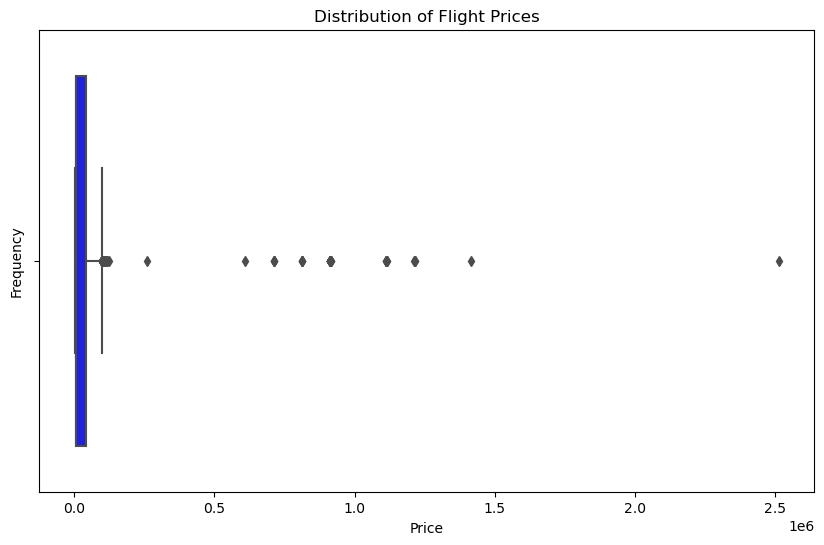

In [27]:
# Plot the distribution of flight prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x='price', color='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [28]:
#outlier checking
q1=df['price'].quantile(0.25) 
q3=df['price'].quantile(0.75)
iqr=q3-q1
#iqr_order
lower_limit_order=q1 - 1.5*iqr
upper_limit_order=q3 + 1.5*iqr
print(lower_limit_order)
print(upper_limit_order)

-51824.0
99128.0


In [29]:
# Removing the outliers
df=df[(df['price'] > lower_limit_order) & (df['price'] < upper_limit_order)]

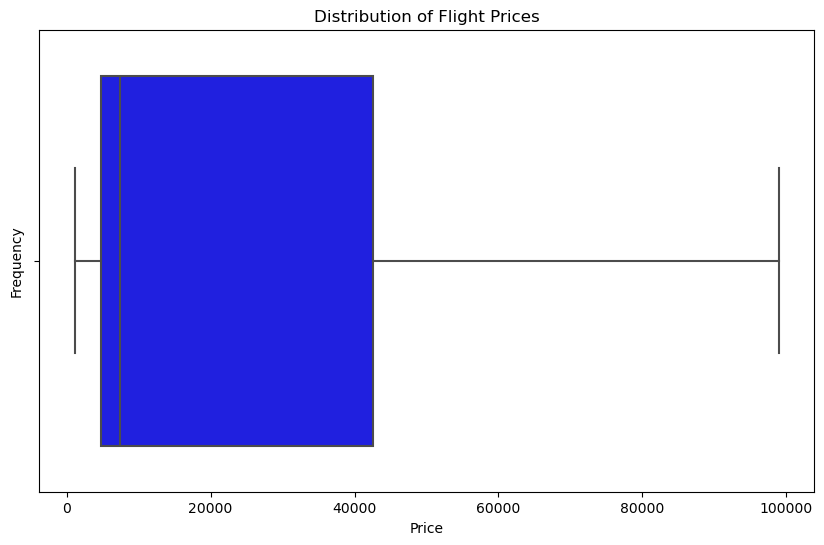

In [30]:
# Plot the distribution of flight prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x='price', color='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [31]:
#columns for check
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [32]:
#save the cleaned data
df.to_csv('Flight_cleaned_data.csv',index=False)

In [33]:
df['airline'].value_counts()

airline
Vistara      127741
Air_India     80895
Indigo        43121
GO_FIRST      23175
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

## EDA

### Statistical Analysis

In [34]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,130.2,1,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,139.8,1,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,130.2,1,5956.0
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,135.0,1,5955.0
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,139.8,1,5955.0


In [35]:
df.describe()

,stops,duration,days_left,price
count,300041.000000,300041.000000,300041.000000,300041.000000
mean,0.924187,733.514397,26.011092,20855.101533
std,0.398046,437.883209,13.558476,22638.391755
min,0.000000,49.800000,1.000000,1105.000000
25%,1.000000,409.800000,15.000000,4783.000000
50%,1.000000,675.000000,26.000000,7425.000000
75%,1.000000,970.200000,38.000000,42521.000000
max,2.000000,37335.000000,49.000000,98972.000000


### Data Visualization

### Distribution of Flight Prices

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


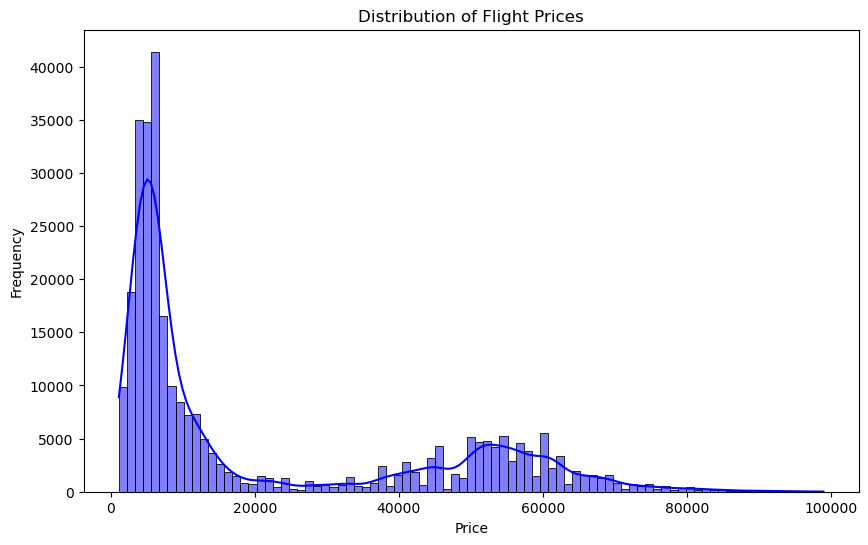

In [36]:
# Plot the distribution of flight prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## conclusion:
The distribution of flight prices is heavily right-skewed, indicating that while most flights are priced lower, there are a few flights with significantly higher prices.


### Number of Flights per Airline and Average Flight Price per Airline

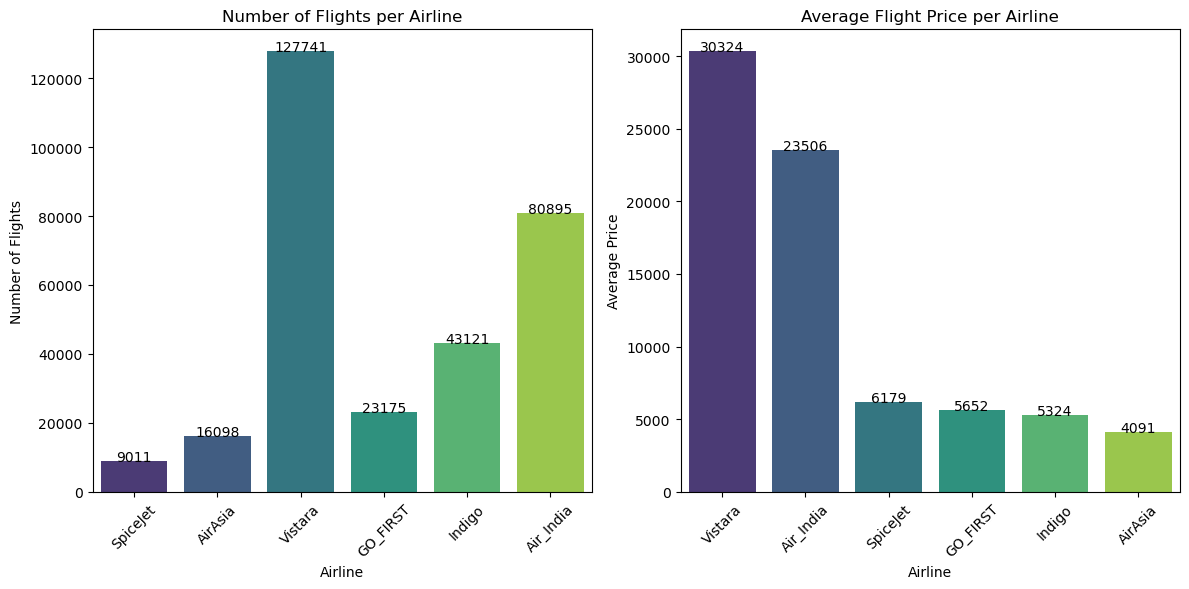

In [37]:
# Create subplots with specified figure size
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Number of Flights per Airline
sns.countplot(data=df, x='airline', palette='viridis', ax=ax[0])
ax[0].set_title('Number of Flights per Airline')
ax[0].set_xlabel('Airline')
ax[0].set_ylabel('Number of Flights')
ax[0].tick_params(axis='x', rotation=45)
# Calculate the height of each bar and add values above bars
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')

# Plot 2: Average Flight Price per Airline
avg_price_per_airline = df.groupby('airline')['price'].mean().reset_index().sort_values(by='price', ascending=False)
sns.barplot(data=avg_price_per_airline, x='airline', y='price', palette='viridis', ax=ax[1])
ax[1].set_title('Average Flight Price per Airline')
ax[1].set_xlabel('Airline')
ax[1].set_ylabel('Average Price')
ax[1].tick_params(axis='x', rotation=45)
# Calculate the height of each bar and add values above bars
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')

plt.tight_layout()  # Adjust layout
plt.show()

### conclusion:
Vistara has the highest number of flights at 127,741, making it the most frequent airline in the dataset. Vistara and Air India have the highest average flight prices at 30,324 and 23,506 units respectively, suggesting a focus on premium pricing strategies.


## Total no of Flight From Each Source City

In [38]:
df['source_city'].value_counts() # total no of flight from each source city

source_city
Delhi        61327
Mumbai       60870
Bangalore    52055
Kolkata      46307
Hyderabad    40804
Chennai      38678
Name: count, dtype: int64

### Average Flight Duration per Airline

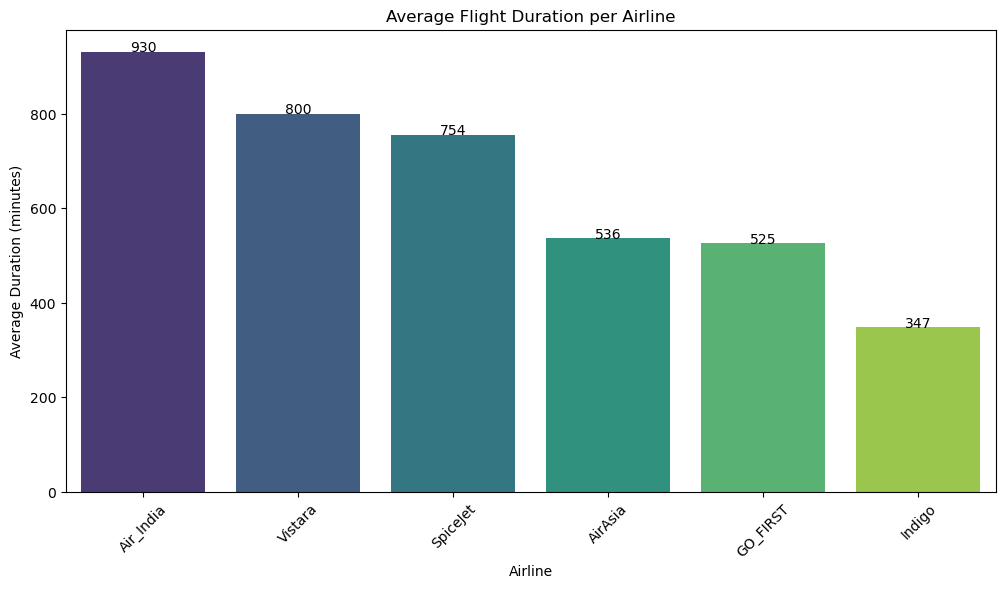

In [39]:
# Plot the average flight duration per airline
plt.figure(figsize=(12, 6))
avg_duration_per_airline = df.groupby('airline')['duration'].mean().reset_index().sort_values(by='duration', ascending=False)
sns.barplot(data=avg_duration_per_airline, x='airline', y='duration', palette='viridis')
plt.title('Average Flight Duration per Airline')
plt.xlabel('Airline')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
# Calculate the height of each bar and add values above bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')
plt.show()

## conclusion:
Some airlines have significantly longer flights (e.g., Air_India with 930 minutes) while others are much shorter (e.g., GO-FIRST with 525 and Indigo with 347 minutes.


### Number of Flights per Class and Average Flight Price per Class

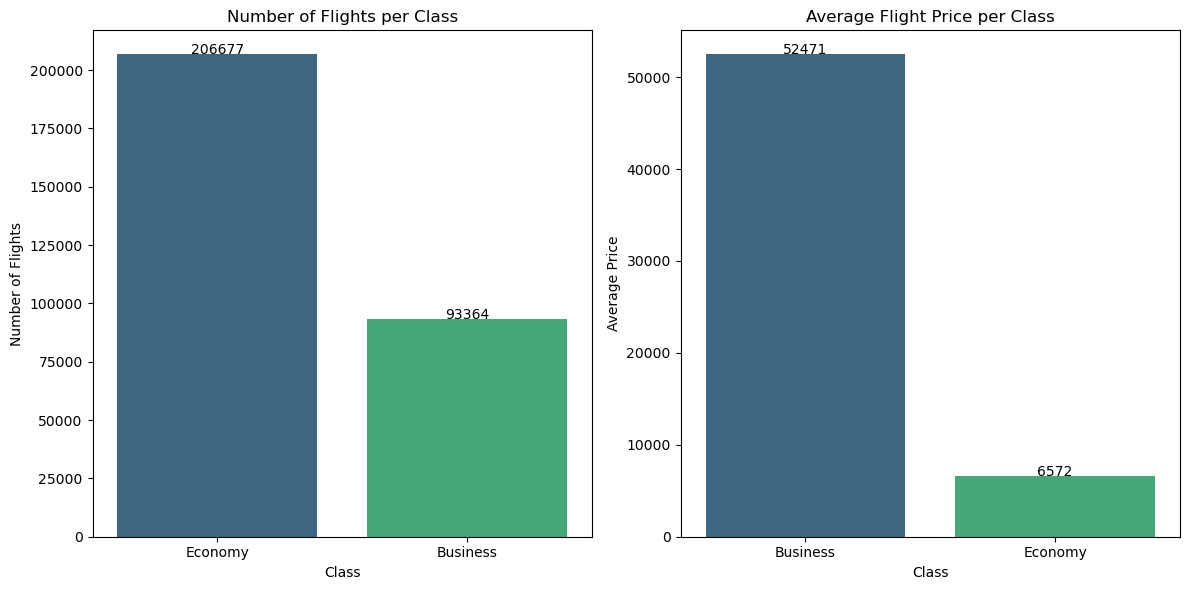

In [40]:
# Create subplots with specified figure size
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Number of Flights per Class
sns.countplot(data=df, x='class', palette='viridis', ax=ax[0])
ax[0].set_title('Number of Flights per Class')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of Flights')
# Calculate the height of each bar and add values above bars
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')

# Plot 2: Average Flight Price per Class
avg_price_per_class = df.groupby('class')['price'].mean().reset_index()
sns.barplot(data=avg_price_per_class, x='class', y='price', palette='viridis', ax=ax[1])
ax[1].set_title('Average Flight Price per Class')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Average Price')
# Calculate the height of each bar and add values above bars
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')

plt.tight_layout()  # Adjust layout
plt.show()

## conclusion:
Economy class has a significantly higher number of flights (206,677) compared to Business class (93,364).But Business class has a higher average price (52,471) than Economy class (6572).


### Number of Stops Per Flight and Average Flight Price Per Number of Stops

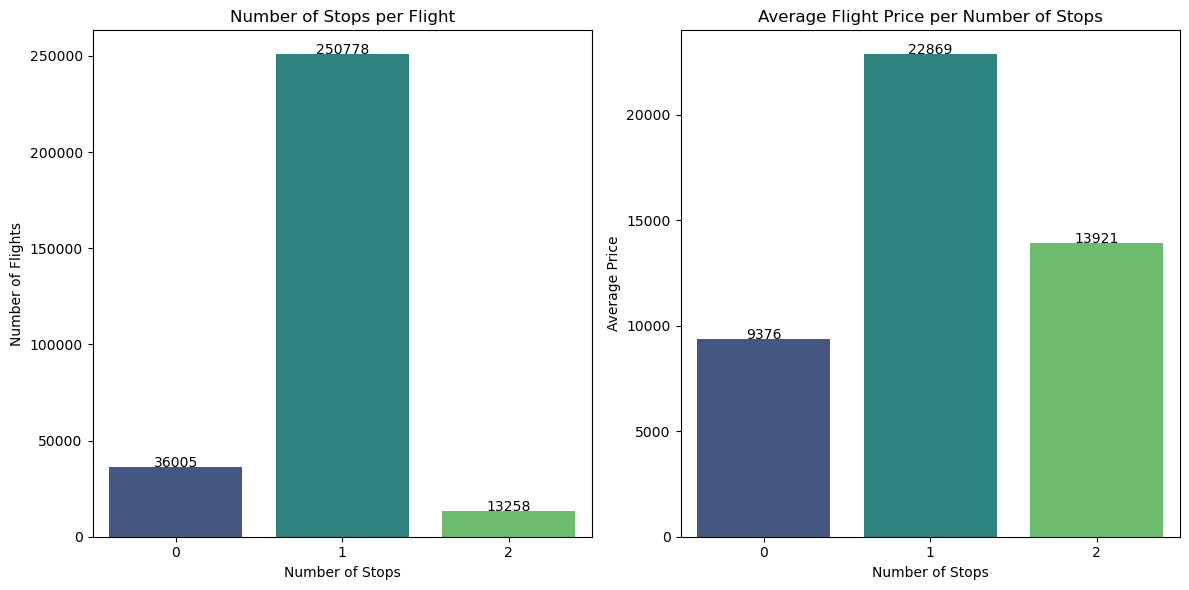

In [41]:
# Create subplots with specified figure size
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Number of Stops per Flight
sns.countplot(data=df, x='stops', palette='viridis', ax=ax[0])
ax[0].set_title('Number of Stops per Flight')
ax[0].set_xlabel('Number of Stops')
ax[0].set_ylabel('Number of Flights')
# Calculate the height of each bar and add values above bars
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')

# Plot 2: Average Flight Price per Number of Stops
avg_price_per_stops = df.groupby('stops')['price'].mean().reset_index()
sns.barplot(data=avg_price_per_stops, x='stops', y='price', palette='viridis', ax=ax[1])
ax[1].set_title('Average Flight Price per Number of Stops')
ax[1].set_xlabel('Number of Stops')
ax[1].set_ylabel('Average Price')
# Calculate the height of each bar and add values above bars
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')

plt.tight_layout()  # Adjust layout
plt.show()

## conclusion:
Most flights have either 1 stop or no stops. A smaller number of flights have 2 stops. Flights with 1 stop tend to be the most expensive .Flights with 2 stops are cheaper than one-stop flights but still pricier than direct flights.


## Check How Price Change With Change in Source to Destination

Text(0.5, 1.0, 'Price Change With Change In Source To Destination')

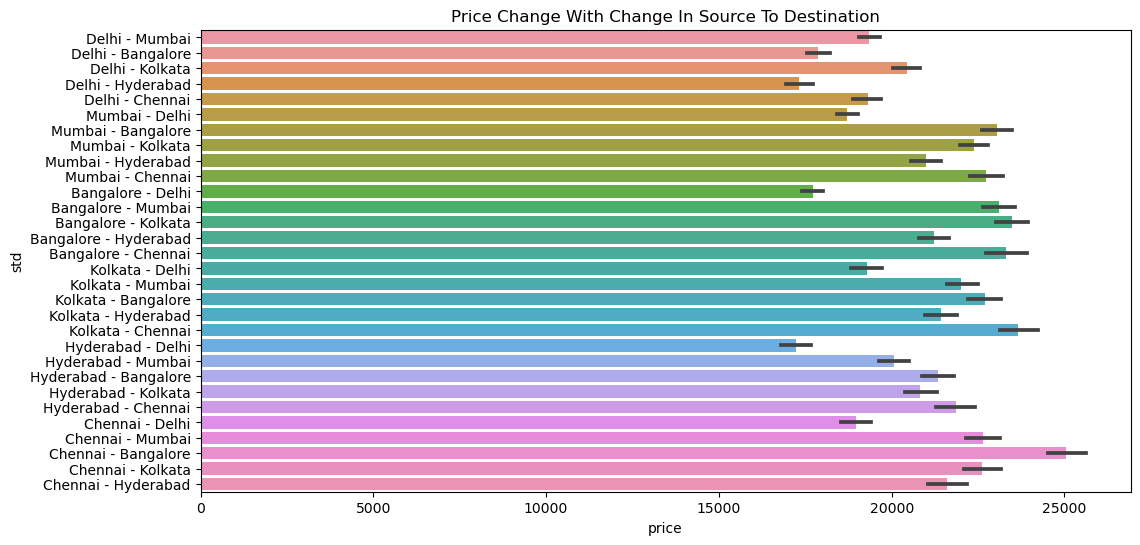

In [42]:
# how does price change with change in source to destination
plt.figure(figsize=(12,6))
df['std']=df['source_city'] +' - '+ df['destination_city']
sns.barplot(y='std',x='price', data =df)
plt.title('Price Change With Change In Source To Destination')


## conclusion:
chennai to bangalore flights are most expensive flights compare to other source city to destination city flights. 

### Analyze How Price Varies With Departure time and Arrival time

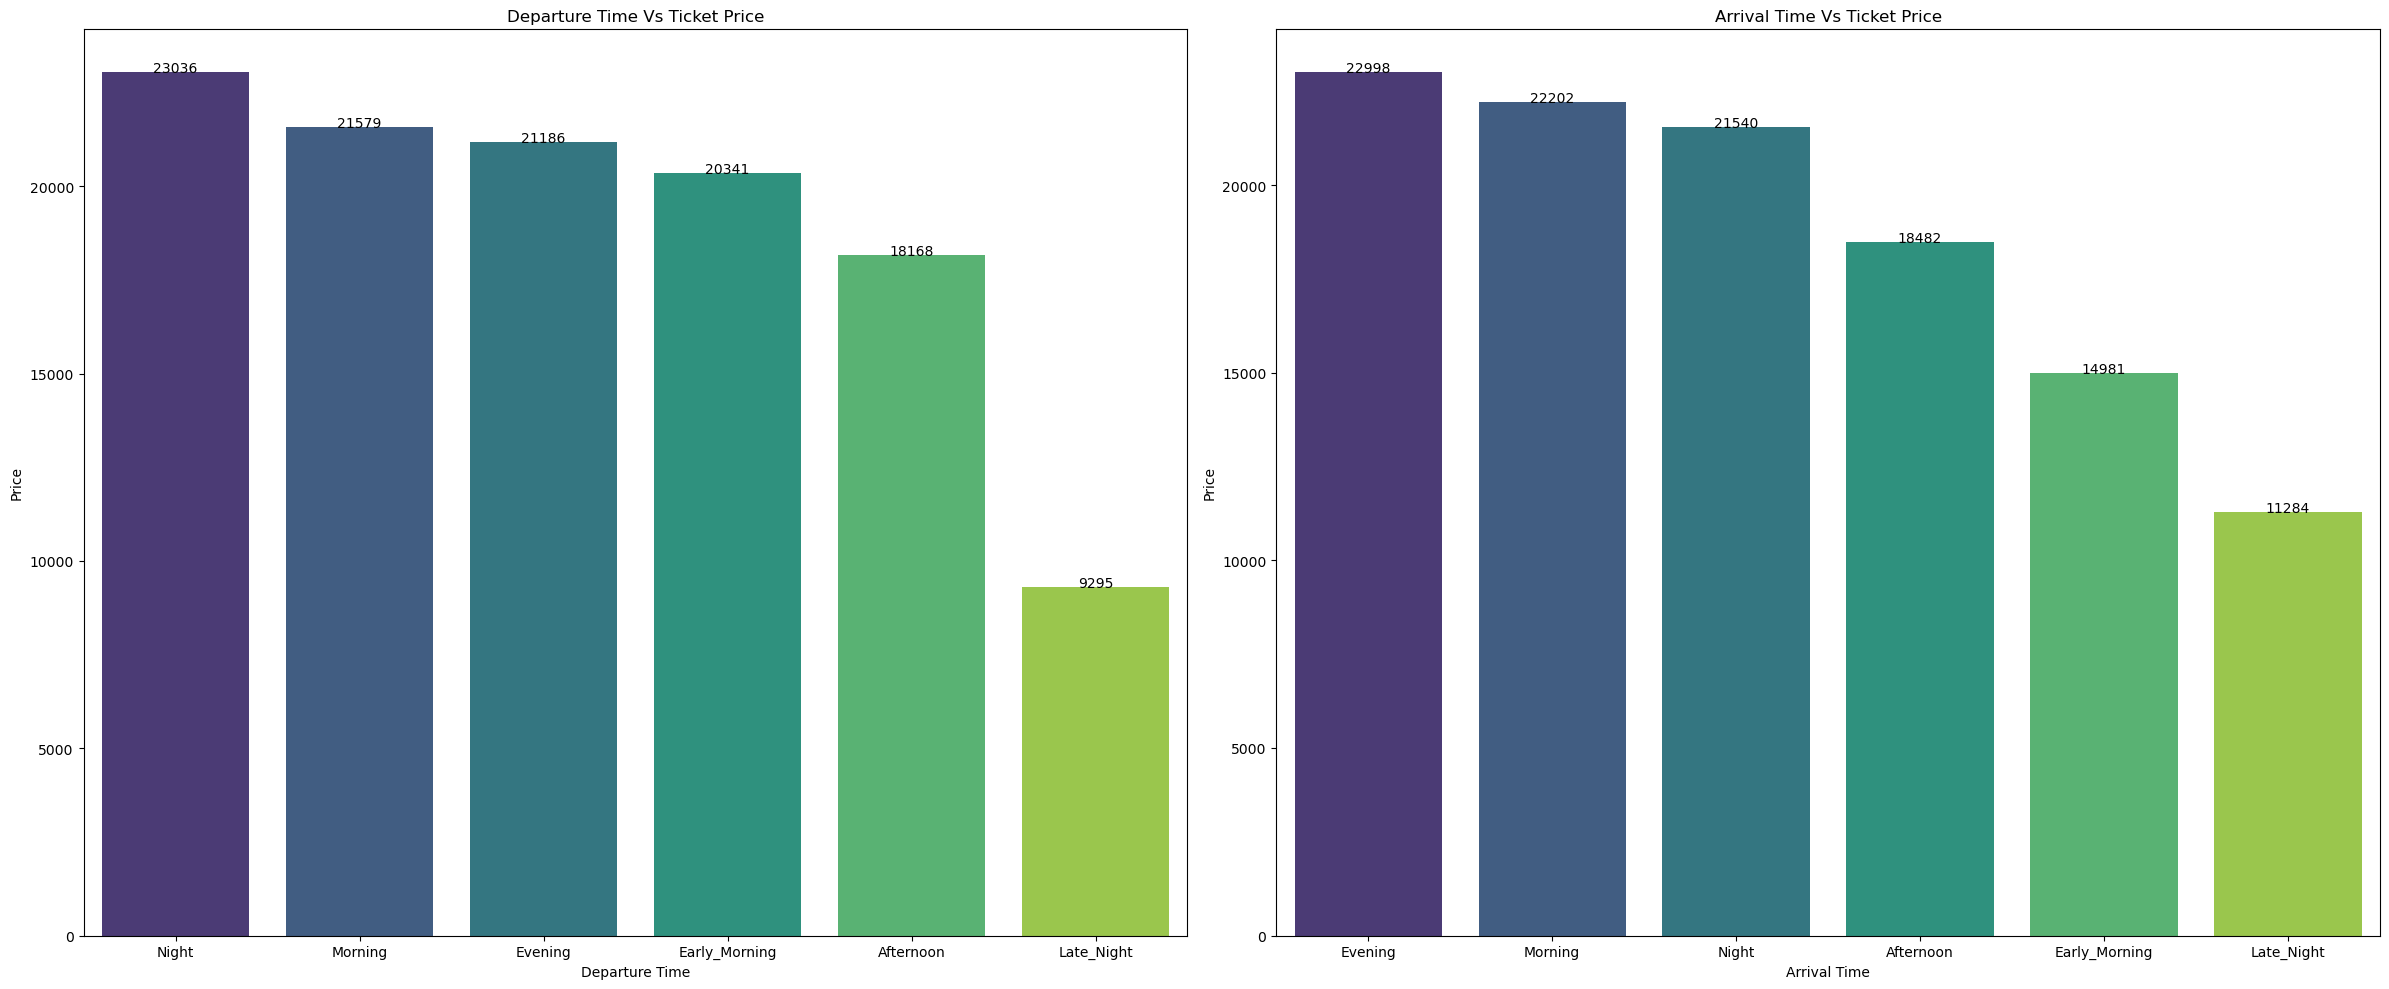

In [81]:
data_dep_sorted = df.groupby('departure_time', as_index=False)['price'].mean().sort_values(by='price',ascending=False)
data_arr_sorted = df.groupby('arrival_time', as_index=False)['price'].mean().sort_values(by='price',ascending=False)

# Create figure with specified size
plt.figure(figsize=(24, 10))

# First subplot: Departure Time Vs Ticket Price
plt.subplot(1, 2, 1)
sns.barplot(x='departure_time', y='price', data=data_dep_sorted, palette='viridis')
plt.title('Departure Time Vs Ticket Price')
plt.xlabel('Departure Time')
plt.ylabel('Price')
# Display bar values in sorted order
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha='center')

# Second subplot: Arrival Time Vs Ticket Price
plt.subplot(1, 2, 2)
sns.barplot(x='arrival_time', y='price', data=data_arr_sorted, palette='viridis')
plt.title('Arrival Time Vs Ticket Price')
plt.xlabel('Arrival Time')
plt.ylabel('Price')
# Display bar values in sorted order
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha='center')

plt.tight_layout()  # Adjust layout
plt.show()

## conclusion:
The graph comparing departure times with total prices shows that night  flights tend to be the most expensive, followed by morning ,evening , early morning flights .Afternoon and late night flights have a lower price.
The graph comparing arrival times with total prices reveals  evening flights are associated with higher prices, followed by morning arrivals. Late night arrivals are the least expensive

## Days Left For Departure v/s Price

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


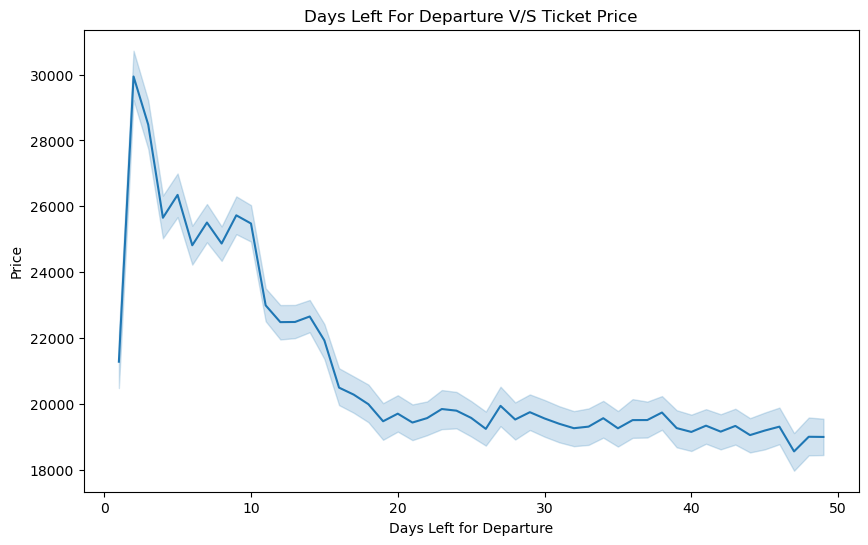

In [72]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='days_left',y='price')
plt.title('Days Left For Departure V/S Ticket Price')
plt.xlabel('Days Left for Departure')
plt.ylabel('Price')
plt.show()

## conclusion:
When there are many days left before departure, prices are low in that time. However, prices are increases as the departure date gets very close.


### Flight Duration v/s Price

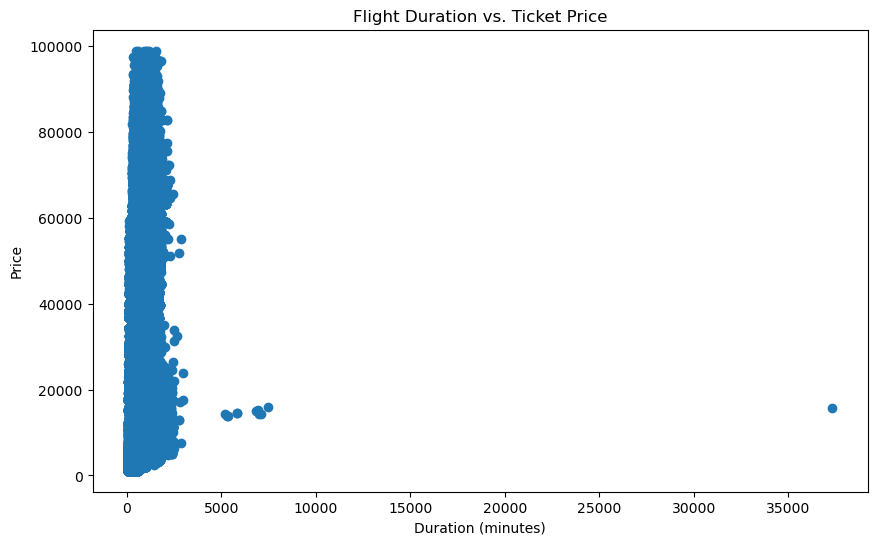

In [77]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['duration'], df['price'])
plt.title('Flight Duration vs. Ticket Price')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')

plt.show()

## conclusion:
Most flights have shorter durations, clustered near the lower left corner. Ticket prices tend to be lower for shorter
flights. A few outliers have longer durations and higher prices.
